<a href="https://colab.research.google.com/github/pete88b/deep_learning_with_python/blob/main/6.2_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os, shutil
from getpass import getpass
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/pete88b/deep_learning_with_python/main/utils/plot_history.py
from plot_history import *

--2022-02-08 19:08:41--  https://raw.githubusercontent.com/pete88b/deep_learning_with_python/main/utils/plot_history.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971 [text/plain]
Saving to: ‘plot_history.py.1’

plot_history.py.1   100%[===================>]     971  --.-KB/s    in 0s      

2022-02-08 19:08:41 (41.0 MB/s) - ‘plot_history.py.1’ saved [971/971]



enter kaggle key via `getpass` do that secrets are not saved in this notebook - which will end up in github

In [2]:
# e.g. {"username":"???","key":"???"}
kaggle_json = getpass('Please enter your kaggle.json contents: ')
with open('kaggle.json', 'w') as f: f.write(kaggle_json)

Please enter your kaggle.json contents: ··········


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
!unzip -qq train.zip

 95% 257M/271M [00:02<00:00, 142MB/s]
100% 271M/271M [00:02<00:00, 115MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 92.1MB/s]
100% 543M/543M [00:03<00:00, 190MB/s]
100% 543M/543M [00:03<00:00, 149MB/s]


In [4]:
original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
        dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [5]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
train_dataset, validation_dataset, test_dataset = [
    image_dataset_from_directory(new_base_dir/subset_name, image_size=[180,180], batch_size=32)
    for subset_name in ['train', 'validation', 'test']]

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
for xb, yb in train_dataset:
    print(xb.shape, yb.shape)
    break

(32, 180, 180, 3) (32,)


In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")]

In [12]:
history  = model.fit(
    train_dataset,
    epochs=15, # no need to run for 30 epochs when we know we'll be overfitting by 10
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 20s 120ms/step - loss: 0.7868 - accuracy: 0.5275 - val_loss: 0.6929 - val_accuracy: 0.5340
Epoch 2/15
63/63 [==============================] - 7s 106ms/step - loss: 0.7258 - accuracy: 0.5325 - val_loss: 0.6887 - val_accuracy: 0.6090
Epoch 3/15
63/63 [==============================] - 7s 107ms/step - loss: 0.6732 - accuracy: 0.5990 - val_loss: 0.6477 - val_accuracy: 0.6410
Epoch 4/15
63/63 [==============================] - 7s 106ms/step - loss: 0.6437 - accuracy: 0.6420 - val_loss: 0.6353 - val_accuracy: 0.6480
Epoch 5/15
63/63 [==============================] - 7s 105ms/step - loss: 0.6000 - accuracy: 0.6895 - val_loss: 0.6531 - val_accuracy: 0.6300
Epoch 6/15
63/63 [==============================] - 7s 107ms/step - loss: 0.5627 - accuracy: 0.7240 - val_loss: 0.6045 - val_accuracy: 0.6930
Epoch 7/15
63/63 [==============================] - 7s 108ms/step - loss: 0.5114 - accuracy: 0.7435 - val_loss: 0.6059 - val_accuracy: 0.6970
Epoch

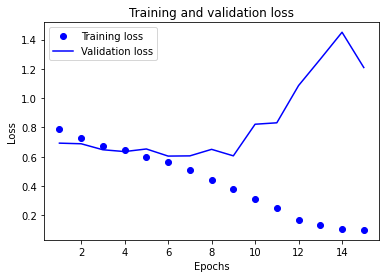

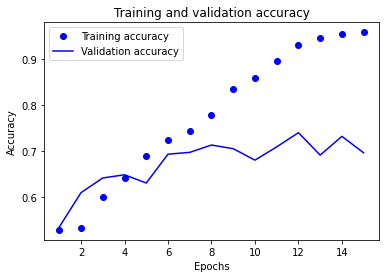

In [14]:
plot_history(history)

In [15]:
keras.models.load_model('convnet_from_scratch.keras').evaluate(test_dataset)

63/63 [==============================] - 8s 104ms/step - loss: 0.6144 - accuracy: 0.6720


[0.614424467086792, 0.671999990940094]

# Data augmentation

In [16]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)])

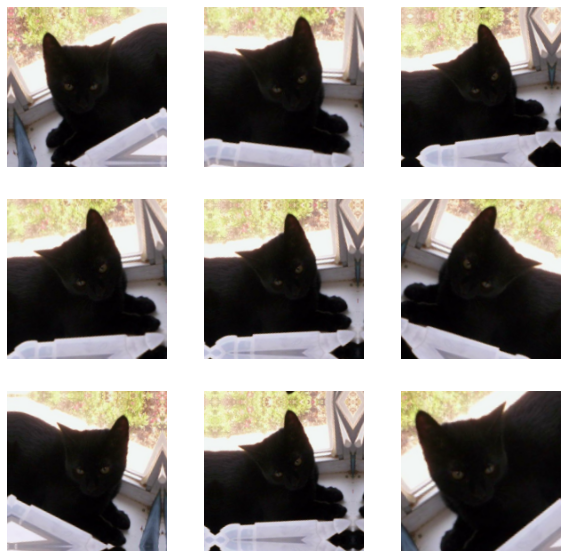

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])